In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from IPython.display import display
from PIL import Image, ImageFilter
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #dataseti yuklemek

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_val, y_val = x_train[:15000], y_train[:15000]  # ilk 15000
x_tr, y_tr = x_train[15000:], y_train[15000:]

In [ ]:
x_tr_blurred = np.copy(x_tr)
x_test_blurred = np.copy(x_test)

In [ ]:
#Gaussian Blurlama
def gaussian_blur(images, kernel_size=(5, 5), percent=100):
    blurred_images = []
    total_images = len(images)
    blur_count = int(total_images * (percent / 100))

    for i in range(total_images):
        img = images[i]
        if i < blur_count:
            img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            blurred = cv2.GaussianBlur(img_bgr, kernel_size, 0)
            img_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
            blurred_images.append(img_rgb)
        else:
            blurred_images.append(img)
    return np.array(blurred_images)

#x_test_blurred = gaussian_blur(x_test_blurred, percent=100) #(0, 50, 100)
#x_tr_blurred = gaussian_blur(x_tr_blurred, percent=30)

In [ ]:
def median_blur(images, kernel_size=5, percent=100):  # kernel_size artık int
    blurred_images = []
    total_images = len(images)
    blur_count = int(total_images * (percent / 100))

    for i in range(total_images):
        img = images[i]
        if i < blur_count:
            img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            blurred = cv2.medianBlur(img_bgr, kernel_size)  # sadece 2 argüman
            img_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)
            blurred_images.append(img_rgb)
        else:
            blurred_images.append(img)
    return np.array(blurred_images)

x_test_blurred = median_blur(x_test_blurred, kernel_size=5, percent=100)#(0, 50, 100)
x_tr_blurred = median_blur(x_tr_blurred, kernel_size=5, percent=30)


In [ ]:
x_tr = x_tr.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_blurred = x_test_blurred.astype('float32') / 255.0
x_tr_blurred = x_tr_blurred.astype('float32') / 255.0

num_classes = 10

Y_tr = to_categorical(y_tr, num_classes=num_classes)
Y_val = to_categorical(y_val, num_classes=num_classes)
Y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
#model

print(num_classes)

model = Sequential()

#first
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#second
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


#Полносвязные слои
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3)) #overfitting olmasin diye
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))


# Выходной слой (10 классов)
model.add(Dense(10, activation='softmax'))



10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 30
batch_size = 256 #изза того что эпоха большая делим на батчи типо пакетики (объекты)
l_rate = 0.001
decay = l_rate / epochs #снижение для того чтобы найти лучшее решение(мелкте шаги)

optimizer = Adam(learning_rate=l_rate, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_tr_blurred, Y_tr, validation_data=(x_val, Y_val), epochs=epochs, batch_size=batch_size)
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 68s 475ms/step - accuracy: 0.2359 - loss: 2.0341 - val_accuracy: 0.4232 - val_loss: 1.5805
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 87s 511ms/step - accuracy: 0.4435 - loss: 1.5320 - val_accuracy: 0.5239 - val_loss: 1.3314
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 68s 495ms/step - accuracy: 0.5093 - loss: 1.3606 - val_accuracy: 0.5653 - val_loss: 1.2173
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 492ms/step - accuracy: 0.5565 - loss: 1.2528 - val_accuracy: 0.5879 - val_loss: 1.1492
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 495ms/step - accuracy: 0.5892 - loss: 1.1581 - val_accuracy: 0.6061 - val_loss: 1.1125
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 497ms/step - accuracy: 0.6143 - loss: 1.0783 - val_accuracy: 0.6203 - val_loss: 1.0711
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 504ms/step - accuracy: 0.6439 - loss: 0.9940 - val_accuracy: 0.6521 - val_loss: 0.9949
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 80s 493ms/step - accuracy: 0.6675 - loss: 0

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,017,312 (11.51 MB)

 Trainable params: 1,005,770 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,011,542 (7.67 MB)

In [ ]:
# Оценка на тестовом и валидационном наборах
loss, accuracy = model.evaluate(x_test_blurred, Y_test, verbose=1)
loss_val, accuracy_val = model.evaluate(x_val, Y_val, verbose=1)

# Сохранение в DataFrame
history_df = pd.DataFrame(history.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6188 - loss: 1.5703
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6930 - loss: 1.4629


,Test Accuracy,Test Loss,Validation Accuracy,Validation Loss
0,61.11%,1.6069,68.89%,1.4802


469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


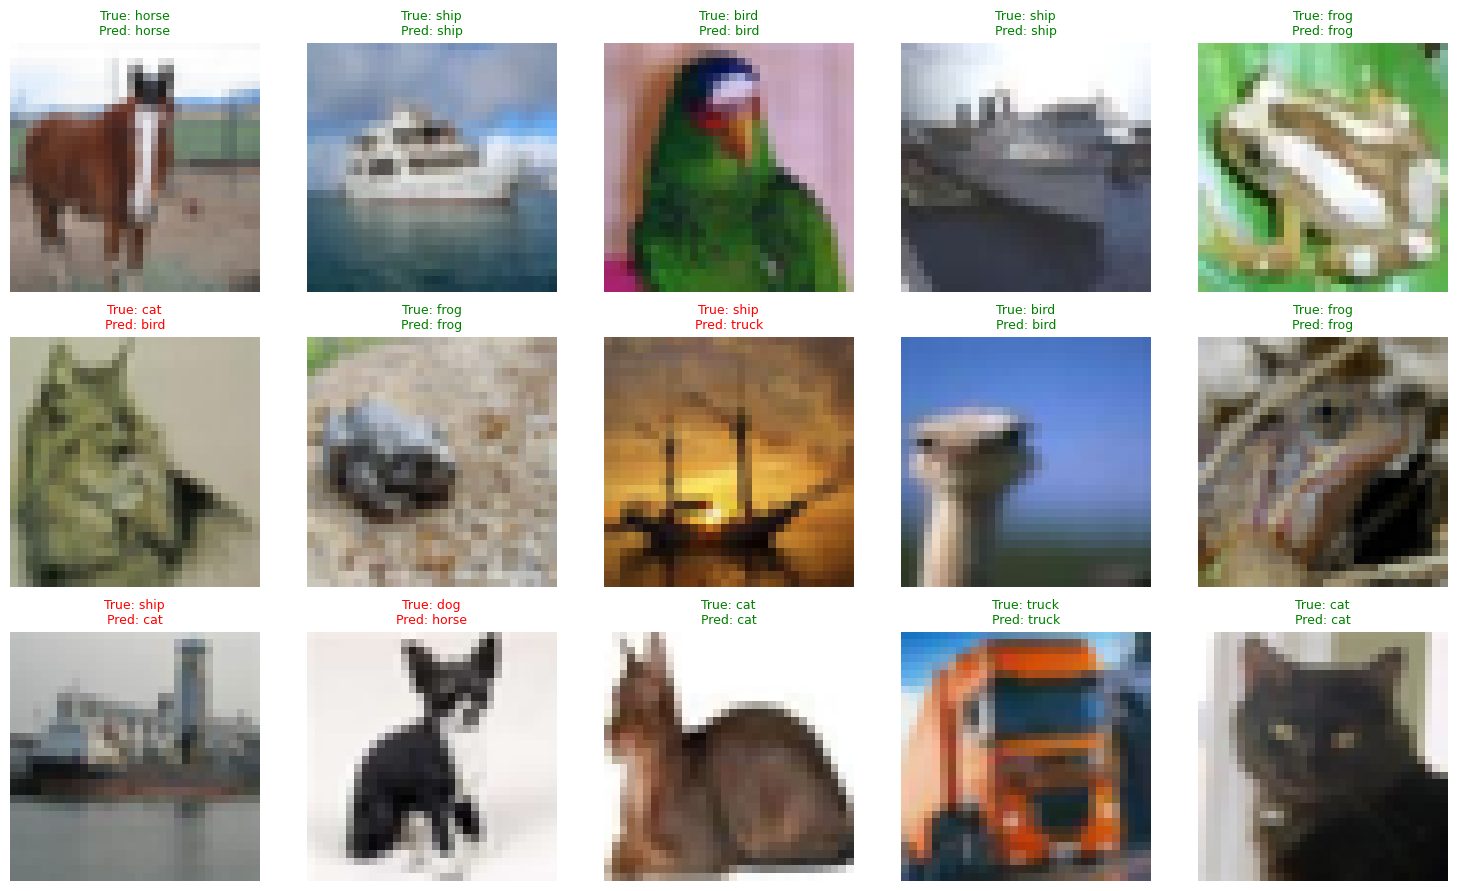

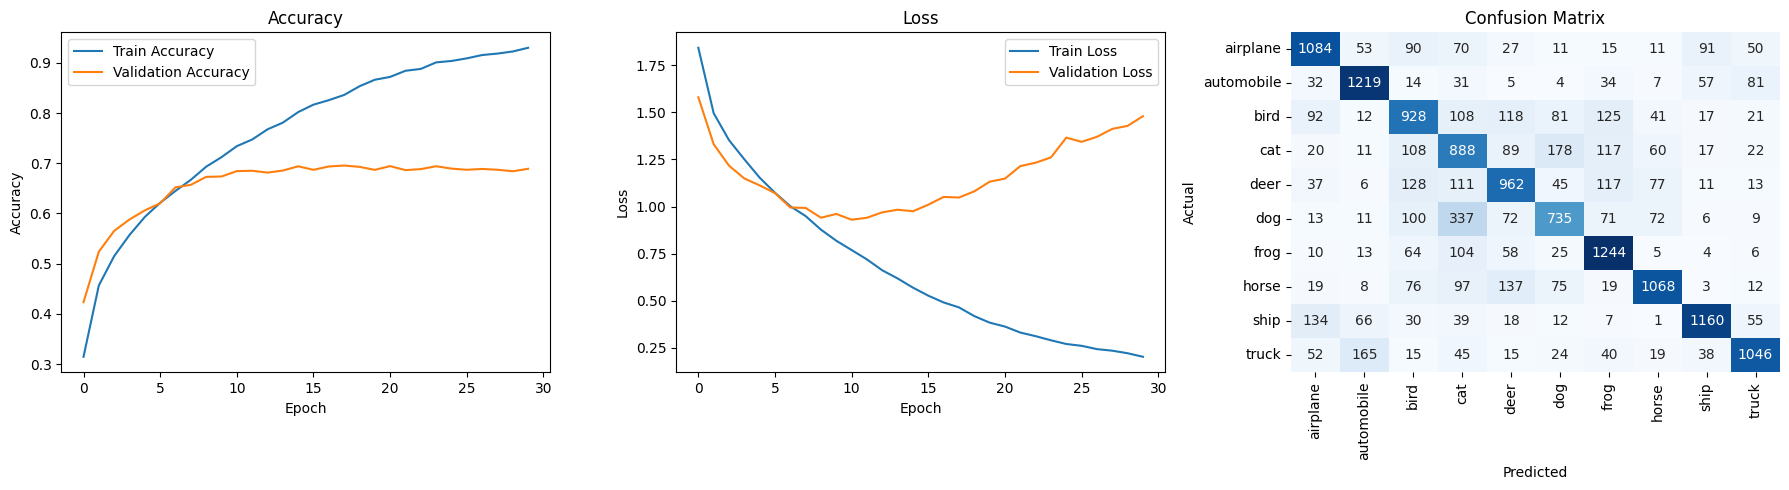

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step
              precision    recall  f1-score   support

    airplane       0.73      0.72      0.72      1502
  automobile       0.78      0.82      0.80      1484
        bird       0.60      0.60      0.60      1543
         cat       0.49      0.59      0.53      1510
        deer       0.64      0.64      0.64      1507
         dog       0.62      0.52      0.56      1426
        frog       0.70      0.81      0.75      1533
       horse       0.78      0.71      0.74      1514
        ship       0.83      0.76      0.79      1522
       truck       0.80      0.72      0.75      1459

    accuracy                           0.69     15000
   macro avg       0.69      0.69      0.69     15000
weighted avg       0.69      0.69      0.69     15000



In [ ]:
results = {
    'Test Accuracy': [f'{accuracy * 100:.2f}%'],
    'Test Loss': [f'{loss:.4f}'],
    'Validation Accuracy': [f'{accuracy_val * 100:.2f}%'],
    'Validation Loss': [f'{loss_val:.4f}']
}
results_df = pd.DataFrame(results)
display(results_df)

# tahminler
predictions = np.argmax(model.predict(x_val), axis=1)

# матрицы ошибок
conf_m = confusion_matrix(y_val, predictions) #sklearn

# Функция для визуализации предсказаний
def plot_predictions(images, true_labels, predicted_labels, label_names, rows=3, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3)) #setka grafikov
    axes = axes.flatten() #2d into 1d

    for i in range(rows * cols):
        if i < len(images):
            axes[i].imshow(images[i])
            true = label_names[true_labels[i][0]]
            pred = label_names[predicted_labels[i]]
            color = 'green' if true_labels[i][0] == predicted_labels[i] else 'red'
            axes[i].set_title(f'True: {true}\nPred: {pred}', color=color, fontsize=9)
            axes[i].axis('off')

    plt.tight_layout() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    plt.show()

# рандомные 15 из вала
sample_i = np.random.choice(len(x_val), 15, replace=False)
plot_predictions(x_val[sample_i], y_val[sample_i], predictions[sample_i], labels)


# Графики accuracy и loss + матрица ошибок
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #1 ряд 3 графика

axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

sns.heatmap(conf_m, annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=labels, yticklabels=labels,
            cbar=False, ax=axes[2])
axes[2].set_title('Confusion Matrix') #seaborn
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

history_df.to_csv('cnn_training_history.csv', index=False)
from google.colab import files
files.download('cnn_training_history.csv')



# Отчет классификации
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_val.flatten()

report = classification_report(y_true, y_pred_classes, target_names=labels) #sklearn.metricss
print(report)